In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.preprocessing import StandardScaler, normalize

from sklearn.mixture import GaussianMixture

# Customer Personality Analysis

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## Take a look at the data

In [2]:
data=pd.read_csv('marketing_campaign.csv',header=0,sep='\t')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Data Preparation

In [5]:
# Dropping null values

data.dropna(axis = 0, how = 'any', inplace = True)


# Adding accepted offers for all the previous campaigns in one column
            
data['campaigns'] = data["AcceptedCmp1"] + data["AcceptedCmp2"] + data["AcceptedCmp3"] + data["AcceptedCmp4"] + data["AcceptedCmp5"] + data['Response']

# Check values of the complain column(Complained during the last two years 1(yes) or 0(no))

data.Complain.value_counts(normalize= True)

# Dropping useless columns and the one I combined in one column

data.drop(axis = 1, columns = ['Z_Revenue', 'Z_CostContact'], inplace = True)

data.drop(axis = 1, columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'], inplace = True)

# Create the age column by substracting the year_birth from 2014 then droping the year_birth column

data['age'] = 2014 - data['Year_Birth']

data.drop(columns = 'Year_Birth', inplace = True)

# Creating the column spending by adding the money spent on all products and droping the combined columns

data['spendings'] = data['MntSweetProducts'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntWines'] + data['MntFruits'] + data['MntGoldProds']

data.rename(columns={'MntSweetProducts' : "sweet", 'MntMeatProducts' : "meat", 'MntFishProducts' : "fish", 'MntWines' : "wine", 'MntFruits' : 'fruit', 'MntGoldProds' : 'gold'}, inplace = True)

# Combine teenhome and kidhome as childeren then drop them

data['children'] = data['Teenhome'] + data['Kidhome']

data.drop(columns=['Teenhome', 'Kidhome'], inplace = True)

# Creating "months" column that designates for how long a customer has been
# registered  supposing that today's date is 01/09/2014


data['months'] = round((datetime.date(2014,9,1) - pd.to_datetime(data['Dt_Customer'], format = '%d-%m-%Y').dt.date).dt.days / 30, 0) 

data.drop('Dt_Customer', axis = 1, inplace = True)

# Converting the Marital_Status column into "alone" 1(yes) 0(no)

data['alone'] = data['Marital_Status'].map(lambda x : 1 if x in ['Married', 'Together'] else 0)

data.drop('Marital_Status', axis = 1, inplace = True)

# Rename some long columns

data.rename(columns = {'NumWebPurchases' : 'web', 'NumDealsPurchases' : 'deals', 'NumCatalogPurchases' : 'catalog', 'NumStorePurchases': 'store', 'NumWebVisitsMonth': 'web_visits'}, inplace = True)

### Looking for outliers

- Eventually we will use K-means to cluster that data, and this algorithm is distance-based, so it's extremely sensitive to outliers .

In [6]:
data.describe()

,ID,Income,Recency,wine,fruit,meat,fish,sweet,gold,deals,...,catalog,store,web_visits,Complain,campaigns,age,spendings,children,months,alone
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,52247.251354,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,...,2.671029,5.800993,5.319043,0.009477,0.448556,45.179603,607.075361,0.947202,13.916968,0.645307
std,3249.376275,25173.076661,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,...,2.926734,3.250785,2.425359,0.096907,0.892440,11.985554,602.900476,0.749062,6.755609,0.478528
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,5.000000,0.000000,2.000000,0.000000
25%,2814.750000,35303.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,37.000000,69.000000,0.000000,8.000000,0.000000
50%,5458.500000,51381.500000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,44.000000,396.500000,1.000000,14.000000,1.000000
75%,8421.750000,68522.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,...,4.000000,8.000000,7.000000,0.000000,1.000000,55.000000,1048.000000,1.000000,20.000000,1.000000
max,11191.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,...,28.000000,13.000000,20.000000,1.000000,5.000000,121.000000,2525.000000,3.000000,25.000000,1.000000


/home/zein/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

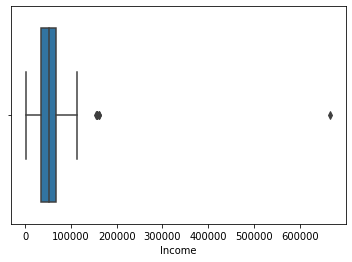

In [7]:
sns.boxplot(data.Income)

In [8]:
data.Income[data.Income > 100000].count()

13

In [9]:
# Let's drop those whose income is more than 100000, there are 13 customers

data.drop(data[data.Income > 100000].index, inplace = True)

In [10]:
data.describe()

,ID,Income,Recency,wine,fruit,meat,fish,sweet,gold,deals,...,catalog,store,web_visits,Complain,campaigns,age,spendings,children,months,alone
count,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,...,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000
mean,5586.266455,51512.049932,49.046754,305.584657,26.319564,165.364049,37.683159,26.864730,43.945983,2.321380,...,2.635497,5.810259,5.340899,0.009532,0.443940,45.195188,605.762143,0.950522,13.912392,0.645030
std,3250.521402,20577.702498,28.939052,337.236335,39.663326,217.982657,54.751768,40.605385,51.671395,1.884791,...,2.789814,3.231085,2.412029,0.097190,0.881186,11.989173,601.908518,0.748479,6.758991,0.478613
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,5.000000,0.000000,2.000000,0.000000
25%,2814.500000,35187.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,37.000000,69.000000,0.000000,8.000000,0.000000
50%,5462.000000,51250.000000,49.000000,177.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,44.000000,396.000000,1.000000,14.000000,1.000000
75%,8419.000000,68134.000000,74.000000,505.000000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,...,4.000000,8.000000,7.000000,0.000000,1.000000,55.000000,1043.500000,1.000000,20.000000,1.000000
max,11191.000000,98777.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,198.000000,321.000000,15.000000,...,28.000000,13.000000,20.000000,1.000000,5.000000,121.000000,2525.000000,3.000000,25.000000,1.000000


/home/zein/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='meat'>

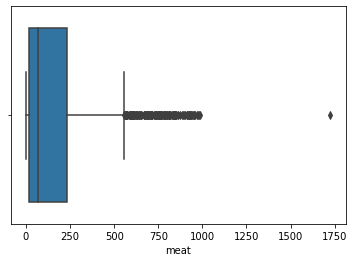

In [11]:
sns.boxplot(data.meat)

In [12]:
data[data.meat > 1000]

,ID,Education,Income,Recency,wine,fruit,meat,fish,sweet,gold,...,catalog,store,web_visits,Complain,campaigns,age,spendings,children,months,alone
21,5376,Graduation,2447.0,42,1,1,1725,1,1,1,...,28,0,1,0,0,35,1730,1,20.0,1


In [13]:
# Dropping one persone whose meat spending is more than 1000

data.drop(data[data.meat > 1000].index, inplace = True)

/home/zein/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='deals'>

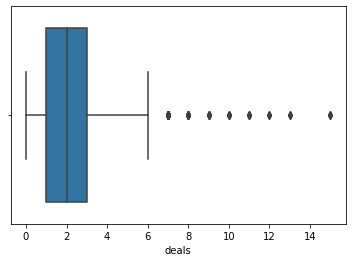

In [14]:
sns.boxplot(data.deals)

In [15]:
data[data.deals > 10].deals.count()

15

In [16]:
# Drop who have bought more than 10 deals, 15 customers

data.drop(data[data.deals > 10].index, inplace = True)

## Data Segmentation

- Here I chose to cluster the data based on the duration of their subscription, their income and spendings

In [28]:
# First we'll scale the data

scaler = StandardScaler()

X = data[['Income', 'spendings', 'months']]

X_scaled = scaler.fit_transform(X)

X = normalize(X_scaled, norm = 'l2')  # Will Calculate the norm of every vector(one row) then divide all its elements by the norm

### Gaussian Mixture Model 

- Probabilistic model that assumes that data is generated from a mixture of a finite number of Gaussian distributions with unknown parameters.


- $Hard$ $Clustering$ : every data point belongs to only one cluster, whereas in $Soft$ $Clustering$ a data points can belong to different clusters like 30% to cluster 1 and 70% to cluster 2.


- Gaussian Mixture is a Soft Clustering method :  First, it will start with random Gaussian distributions, then assign data(partially or completely) to the distributions then recalculate the distributions based on the new assignments and repeat this process untill the algorithm converges(obtain the same distribution twice or a very similar one)

1) First step is $Colouring Points$ : We calculate the distance between a point and the distributions, longer the distance, higher probability of belonging.

<img src="gaussian_mix_1.png" height=400 width=600 />

<img src="gm2.png" height=400 width=600 />

***

2) Fitting distributions : 
- We find the Average vector : average of x values, average of y values
- Calculate the Covariance Matrix
- For each data point x (vector [x_i, y_i])  we plug it in the f(x) to get a number that represents the height of the distribution at that point.


<img src="gm3.png" height=300 width=500 />

*****************************************************

### Notes about GMM :

- It's the fastest algorithm for learning mixture models, it maximizes only the Likelihood and doesn't bias the mean towards zero or the cluster size.

- When one has insufficiently many points per mixture, estimating the covariance matrices becomes difficult, and the algorithm is known to diverge and find solutions with infinite likelihood unless one regularizes the covariances artificially.

- Algorithm always uses all of its components, so AIC/BIC is a good method to choose the number of components.


### Choosing n_components

- Normally the best way to choose a model is by training on training dataset, tunning on validation set, and test on the test set but this methods needs a lot of data.  

- Another way is Resampling techniques(like cross validation) which chooses the model based on its performance regardless of its complexity.  

### - Probabilistic model selection(information criteria) : 
- Analytical technique where models are scored based on their performance and complexity. Model performance can be measured by the log-likelihood under the framework of Maximum Likelihood Estimation, and the model complexity may be evaluated using degree of freedom or number of parameters. So Information Criteria techniques try to correct the bias of Maximum Likelihood by adding a penalty term to compensate for the over-fitting of more complex models.

- Probabilistic model selection techniques don't need test data, but their statistic metric cannot be applied to all models, metric should be derived carefully for each model. ANother disadvantage is that they don't account for model uncertainty and they tend to favor overly simple models.

- Maximum Likelihood Estimation : Maximize the conditional probability of observing the data given a probability distribution and its parameters Theta.

In [ ]:
# We will cluster our scaled and normalized X with the Gaussian Mixture Model

gm = GaussianMixture(n_components=4, covariance_type='spherical',max_iter=2000, random_state=5).fit(X)